In [1]:
import sys
sys.path.append('/users/taoshi11/analysator/')
import pytools as pt
import numpy as np

Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using matplotlib version 3.8.4


In [2]:
# First load vlsvReader
filepath = '/scratch/project_2000203/3D/FHA/bulk1/'
filename = 'bulk1.0001000.vlsv'
name = filepath+filename
f = pt.vlsvfile.VlsvReader(file_name = name)


Found population proton


In [3]:
aa =np.load("isocontour_entropy.npy")
seed_coords = np.zeros((aa.shape[0],3))

seed_coords[:,0:2] = aa

In [4]:
seed_coords.shape

(364, 3)

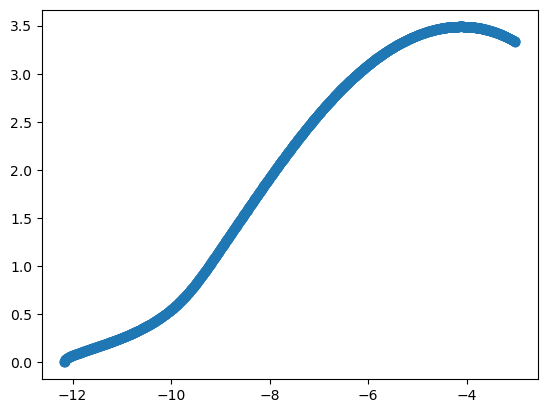

In [14]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

# xxx = np.load("isocontour_1000_io.npy")
# # Calculate the radial distance
# rr = np.linalg.norm(xxx, axis=1)
# theta = np.degrees(np.arccos(xxx[:, 2] / rr))


# phi = np.degrees(np.arctan2(xxx[:, 1], xxx[:, 0]))
# coords_long_lat = np.column_stack((phi, theta))
# xx, yy = theta*np.cos(phi), theta*np.sin(phi)
# coords_long_lat = np.concatenate((xx[:,np.newaxis],yy[:,np.newaxis]),axis = 1)
# np.save("coords_long_lat.npy",coords_long_lat)
# plt.scatter(coords_long_lat[:,0],coords_long_lat[:,1])
# plt.show()


trace_result_test = np.load("trace_result.npy")
plt.scatter(trace_result_test[:,0]/Re,trace_result_test[:,2]/Re)
plt.show()

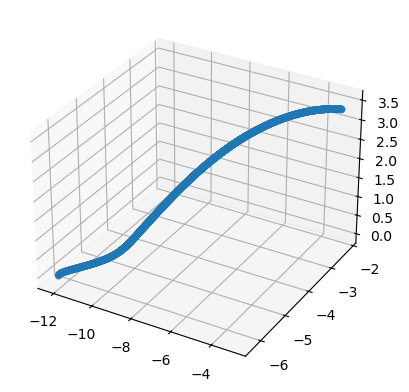

In [40]:
trace_result_test[1752,:]
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(trace_result_test[:,0]/Re,trace_result_test[:,1]/Re,trace_result_test[:,2]/Re)
plt.show()

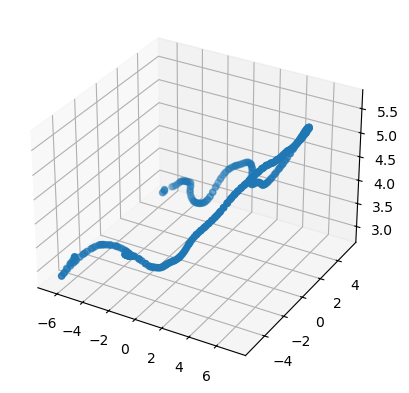

In [11]:
Re = 6371000
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(xxx[:,0]/Re,xxx[:,1]/Re,xxx[:,2]/Re)
plt.show()

In [12]:
np.linalg.norm(xxx,axis = 1)/Re

array([8.36881608, 8.1958727 , 8.14942318, 8.0595772 , 7.99110085,
       7.99153231, 7.98624913, 8.01469941, 8.01497233, 6.67680526,
       6.6775737 , 6.67172928, 6.78133929, 6.90237195, 6.99333929,
       6.93862336, 6.83750482, 6.76050717, 6.74739182, 6.83820669,
       7.00883687, 7.2041427 , 7.17463227, 7.02352641, 6.86389914,
       6.72952453, 6.62643358, 6.54397046, 6.54376559, 6.46408457,
       6.39615843, 6.34451422, 6.24797822, 6.07506921, 6.02415182,
       5.85650042, 5.77635822, 5.67169633, 5.5268406 , 5.41007636,
       5.31566559, 5.23853351, 5.21738568, 5.18575682, 5.14269765,
       5.13015831, 5.12096434, 5.09970793, 5.09176453, 5.08428306,
       5.08641052, 5.08592874, 5.08666937, 5.11455735, 5.11759537,
       5.1773406 , 5.19680224, 5.28257579, 5.31911658, 5.45990258,
       5.47452186, 5.64893608, 5.70619104, 5.83718226, 5.95457643,
       6.0233653 , 6.12328324, 6.20244054, 6.24506361, 6.33125157,
       6.36351859, 6.38947445, 6.42293795, 6.45083885, 6.47966

In [48]:
coords_long_lat.shape

(364, 2)

In [39]:
xxx = np.load("isocontour_1000_io.npy")
# np.linalg.norm(xxx,axis = 1)/Re

array([8.40195102, 8.24537435, 8.21122523, 8.14501682, 8.12934207,
       8.15686139, 8.16448367, 8.21095353, 8.2114306 , 7.14703125,
       7.11974801, 6.91452969, 6.96117374, 6.93032869, 6.97999748,
       7.04681138, 6.93491705, 6.82508564, 6.78794313, 6.85350778,
       6.99858176, 7.14565703, 7.13219063, 7.03376064, 6.9248019 ,
       6.81896734, 6.72348104, 6.63813865, 6.63791595, 6.54908773,
       6.47303344, 6.41861601, 6.31444545, 6.13249381, 6.07924536,
       5.9056186 , 5.82309918, 5.71535023, 5.56684696, 5.44748695,
       5.35125885, 5.27247528, 5.25083581, 5.21844305, 5.17449336,
       5.16176921, 5.15249986, 5.13146863, 5.12369655, 5.11644947,
       5.11881361, 5.11830404, 5.11863359, 5.14568657, 5.14867033,
       5.20714778, 5.22622901, 5.31147094, 5.34775824, 5.4876211 ,
       5.50209531, 5.67504975, 5.73176272, 5.86158754, 5.97765606,
       6.04573032, 6.1438919 , 6.22186239, 6.26310157, 6.34607589,
       6.37689769, 6.40094361, 6.43165316, 6.45743035, 6.48494

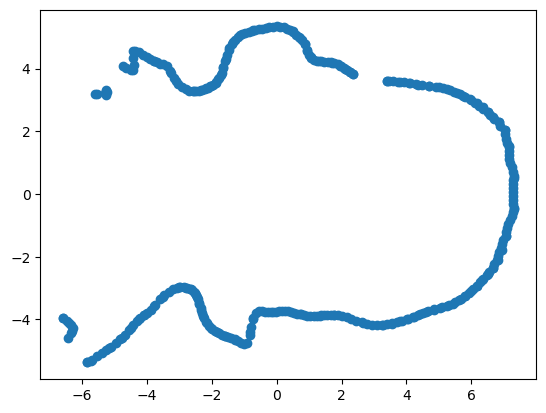

In [29]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
Re = 6371000
plt.scatter(xxx[:,0]/Re,xxx[:,1]/Re)
plt.show()

In [3]:
# Sort cellids and connection variable

connection = f.read_variable('vg_connection')
cellids = f.read_variable("CellID")

indexids = cellids.argsort()
cellids = cellids[indexids]
connection = connection[indexids]

# find the cells that vg_connection is 0
connection_zero_indices = np.where(connection==0)[0]
cellids_closed = cellids[connection_zero_indices]
coords_closed = f.read_variable("vg_coordinates",cellids_closed)

In [4]:
# Cells in the equatorial plane (z = 0)

cellsize_closed = f.read_variable("vg_dx",cellids_closed)
eq_indices = np.where((coords_closed[:,2] < cellsize_closed[:,2]) & (coords_closed[:,2] > 0))[0] # Determine the "close to equatoria" cells
coords_used = coords_closed[eq_indices][:]
cellids_used = cellids_closed[eq_indices]

In [5]:
# Find plasma beta in this region
p_diag = f.read_variable('proton/vg_ptensor_diagonal',cellids_used)
Pressure = (p_diag[:,0] + p_diag[:,1] + p_diag[:,2]) / 3
B = f.read_variable('vg_b_vol' ,cellids_used)
B_mag = np.linalg.norm(B, axis =1)

Beta = 2 * 1.25663706144e-6 * Pressure / (B_mag **2)
B_Pressure = (B_mag **2)/(2 * 1.25663706144e-6)

In [6]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

In [7]:
# Flux transport rate between each MLT sectors
def flux_transport_rate(f,coords,cellids):

    # Determine Er and Etheta
    E = f.read_variable("vg_e_vol",cellids)
    Ex, Ey = E[:,0], E[:,1]
    x,y = coords[:,0], coords[:,1]

    theta = np.arctan2(y,x)
    Er = Ex * np.cos(theta)+ Ey * np.sin(theta)
    Etheta = -Ex * np.sin(theta) + Ey * np.cos(theta)
    return Er,Etheta


Er,Etheta = flux_transport_rate(f,coords_used,cellids_used)

In [8]:
mask = Beta < 1
mask

array([False, False, False, ..., False, False, False])

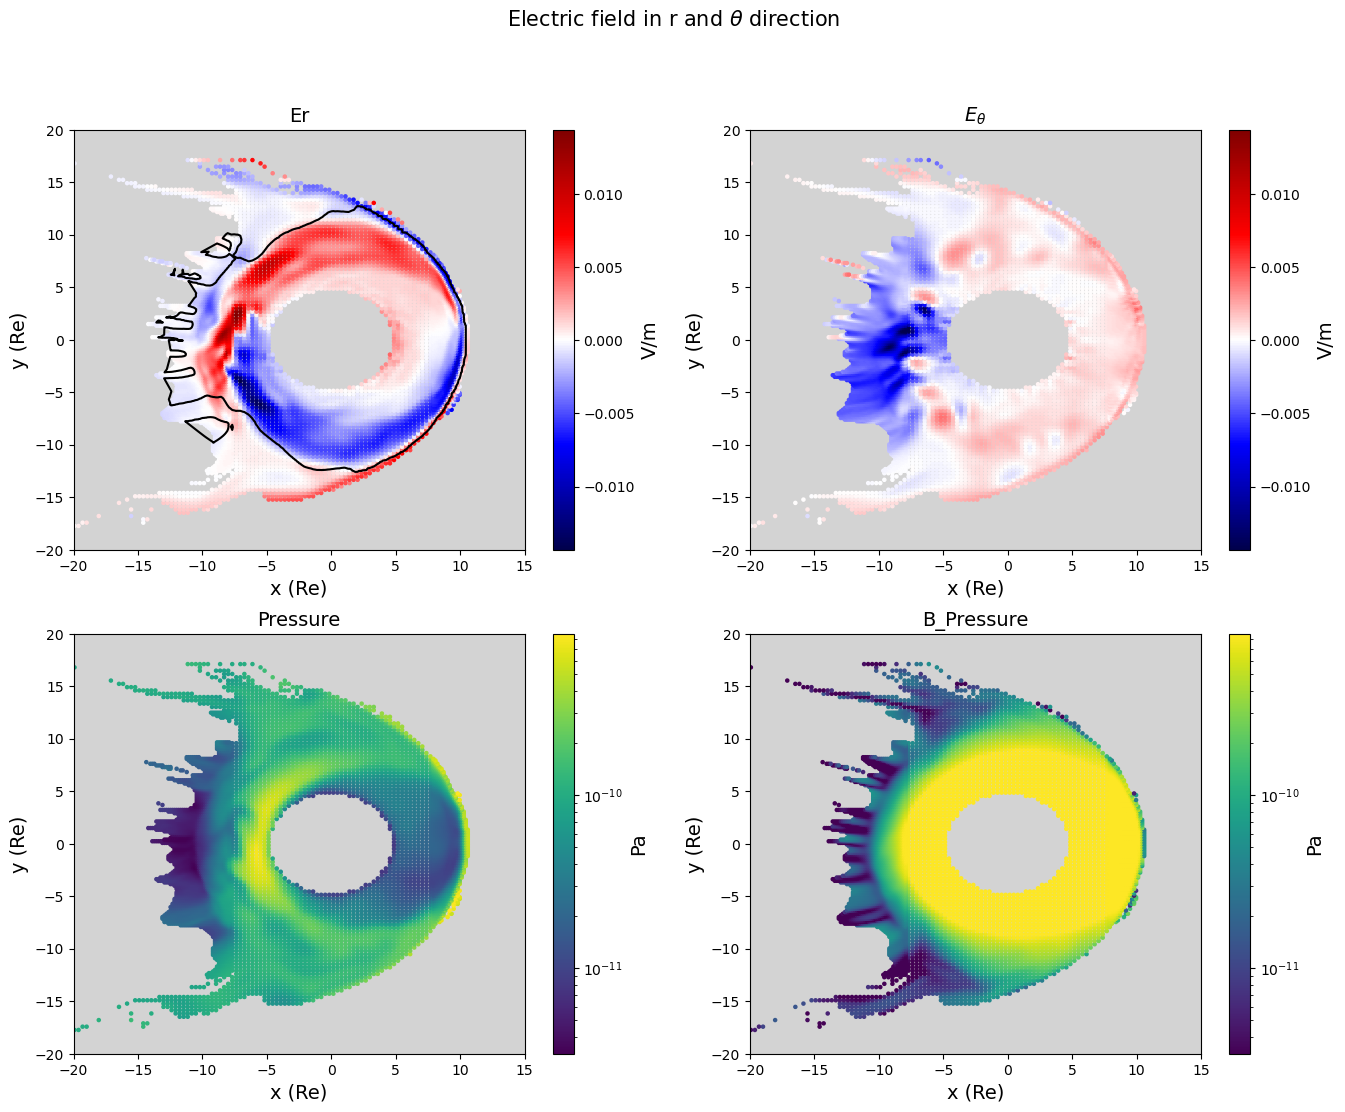

In [9]:
import matplotlib.tri as tri

Re = 6371000

x1 = coords_used[:,0]/Re
y1 = coords_used[:,1]/Re

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax1.set_facecolor("lightgrey")

vmin1 = Er.min()
vmax1 = Er.max()
norm1 = mcolors.TwoSlopeNorm(vmin=vmin1, vcenter=0, vmax=vmax1)

scatter = ax1.scatter(x1, y1, c=Er,norm = norm1,cmap = 'seismic',s = 5)


# for contour plot, create a trinagulation object
tri0 = tri.Triangulation(x1,y1)
contour_beta = ax1.tricontour(tri0, Beta, levels=[1], colors='black')

# ax1.clabel(contour_beta, inline=True, fmt='%1.1f', fontsize=10)

ax1.set_xlim([-20,15])
ax1.set_ylim([-20,20])
ax1.set_xlabel('x (Re)', fontsize = 14)
ax1.set_ylabel('y (Re)', fontsize = 14)
colorbar1 = plt.colorbar(scatter,ax=ax1)
colorbar1.set_label('V/m',fontsize = 14)
ax1.set_title('Er',fontsize = 14)


ax2 = fig.add_subplot(222)
ax2.set_facecolor("lightgrey")


# vmin2 = Etheta.min()
# vmax2 = Etheta.max()
# norm2 = mcolors.TwoSlopeNorm(vmin=vmin2, vcenter=0, vmax=vmax2)

scatter = ax2.scatter(coords_used[:,0]/Re,coords_used[:,1]/Re,c=Etheta,norm = norm1,cmap = 'seismic',s = 5)
ax2.set_xlim([-20,15])
ax2.set_ylim([-20,20])
ax2.set_xlabel('x (Re)',fontsize = 14)
ax2.set_ylabel('y (Re)',fontsize = 14)
colorbar2 = plt.colorbar(scatter,ax=ax2)
colorbar2.set_label('V/m',fontsize = 14)
ax2.set_title(r'$E_\theta$',fontsize = 14)


ax3 = fig.add_subplot(223)
ax3.set_facecolor("lightgrey")
vmin3 = Pressure.min()
vmax3 = Pressure.max()
norm3 = mcolors.LogNorm(vmin=vmin3,  vmax=vmax3)
scatter3 = ax3.scatter(x1, y1, c = Pressure, cmap = 'viridis', norm = norm3, s= 5)
ax3.set_xlim([-20,15])
ax3.set_ylim([-20,20])
ax3.set_xlabel('x (Re)',fontsize = 14)
ax3.set_ylabel('y (Re)',fontsize = 14)
colorbar3 = plt.colorbar(scatter3,ax=ax3)
colorbar3.set_label('Pa',fontsize = 14)
ax3.set_title('Pressure',fontsize = 14)

# B_pressure
ax4 = fig.add_subplot(224)
ax4.set_facecolor("lightgrey")
vmin4 = B_Pressure.min()
vmax4 = B_Pressure.max()
norm4 = mcolors.LogNorm(vmin=vmin4,  vmax=vmax4)
scatter4 = ax4.scatter(x1, y1, c = B_Pressure, cmap = 'viridis', norm = norm3, s= 5)
ax4.set_xlim([-20,15])
ax4.set_ylim([-20,20])
ax4.set_xlabel('x (Re)',fontsize = 14)
ax4.set_ylabel('y (Re)',fontsize = 14)
colorbar4 = plt.colorbar(scatter4,ax=ax4)
colorbar4.set_label('Pa',fontsize = 14)
ax4.set_title('B_Pressure',fontsize = 14)

fig.suptitle(r"Electric field in r and $\theta$ direction",fontsize = 15)

plt.show()

In [10]:
xx = np.array([6] * 500)
yy = np.linspace(-15,15,500)

In [11]:
coords_test = np.zeros((xx.shape[0],3))
coords_test[:,0], coords_test[:,1] = xx,yy
# connection = f.read_variable('vg_connection',)

In [12]:
connection2 = f.read_interpolated_variable('vg_connection',coords_test * Re)

In [13]:
inside = connection2 == 0
coords_test_used = coords_test[inside]

In [14]:
E_test_used = f.read_interpolated_variable("vg_e_vol",coords_test_used * Re)

In [15]:
def Er_Etheta(f,coords):
    E = f.read_interpolated_variable("vg_e_vol",coords)
    # print(E)
    Ex, Ey = E[:,0], E[:,1]
    x, y = coords[:,0], coords[:,1]
    theta = np.arctan2(y,x)
    Er = Ex * np.cos(theta)+ Ey * np.sin(theta)
    Etheta = -Ex * np.sin(theta) + Ey * np.cos(theta)
    return Er, Etheta
    

In [16]:
Er_test, Etheta_test = Er_Etheta(f, coords_test_used * Re)

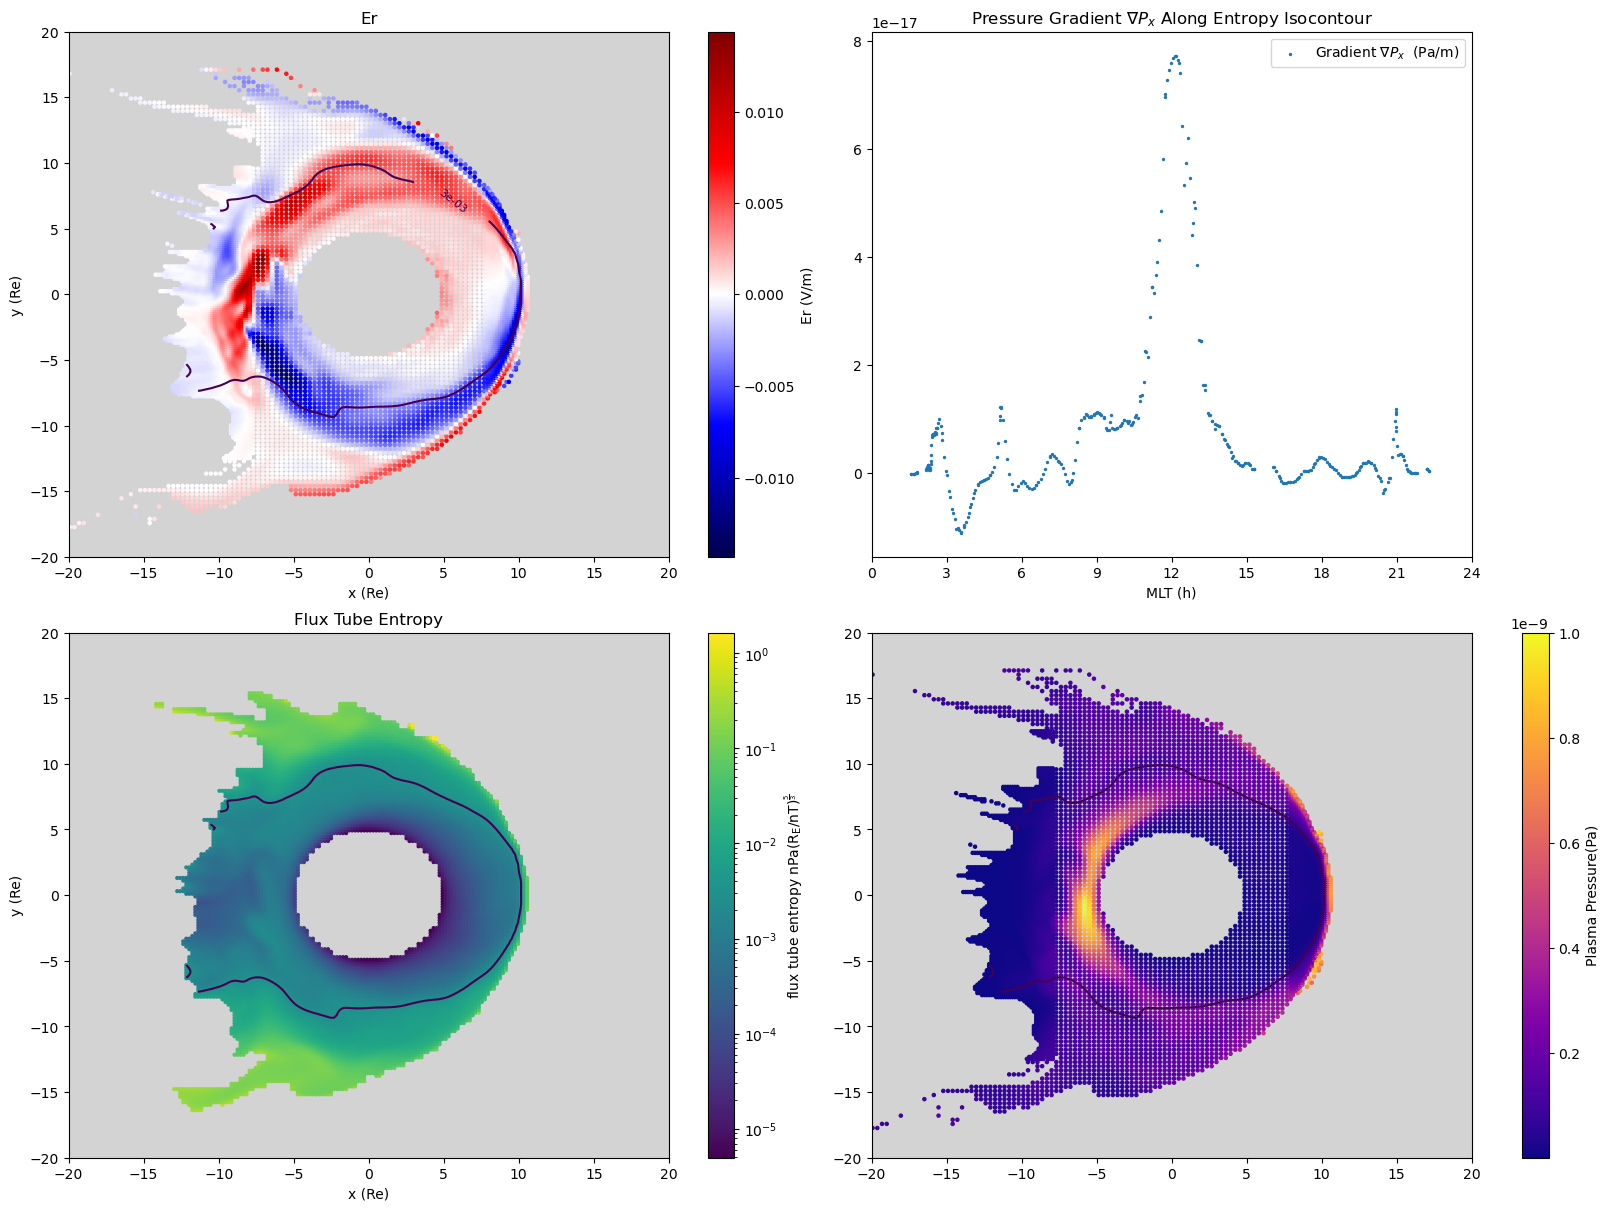

In [17]:
# plot entropy isocontour and the corresponding pressure gradient along the isocontour

def get_MLT_value(coords):
    xx, yy = coords[:, 0], coords[:, 1]

    angles = np.arctan2(yy,xx)
    MLT_values = 12 + angles *(12/np.pi)

    MLT_values = np.where((xx == 0) & (yy > 0), 18, MLT_values)
    MLT_values = np.where((xx == 0) & (yy < 0), 6, MLT_values)

    return MLT_values

Re = 6371000

data = np.load("Entropy_1000s_new.npy")
# Normalize coordinates
x = data[:,0] / Re
y = data[:,1] / Re
entropy = data[:,3]
# entropy1 = data1[:,3]
entropy[entropy > 1] = np.nan  # Mask entropy values greater than 1

# Filter out NaN values
valid = ~np.isnan(entropy)
x_valid = x[valid]
y_valid = y[valid]
entropy_valid = entropy[valid]
# entropy_valid1 = entropy1[valid]


# fig1 = plt.figure(figsize = (16,12))
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
# ax1 = fig1.add_subplot(221)
ax1.set_facecolor("lightgrey")

# Plot scatter
# scatter1 = ax1.scatter(x_valid, y_valid, c=entropy_valid, norm=LogNorm(), cmap='viridis')

# scatter1 = ax1.scatter(x_valid, y_valid, c=entropy_valid * 2, norm=LogNorm(), cmap='viridis', s=4)
vmin1 = Er.min()
vmax1 = Er.max()
norm1 = mcolors.TwoSlopeNorm(vmin=vmin1, vcenter=0, vmax=vmax1)

scatter1 = ax1.scatter(x1, y1, c=Er,norm = norm1,cmap = 'seismic',s = 5)
# ax1.set_title('2N')

# Set a grid for contour
x_grid = np.unique(x_valid)
y_grid = np.unique(y_valid)
XX, YY = np.meshgrid(x_grid, y_grid)
entropy_grid = np.full(XX.shape, np.nan)

# Creating a dictionary for quick lookup of (x, y) pairs
valid_points = {(x, y): e for x, y, e in zip(x_valid, y_valid, entropy_valid)}

for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        point = (XX[i, j], YY[i, j])
        if point in valid_points:
            entropy_grid[i, j] = valid_points[point] * 2

contour1 = ax1.contour(XX,YY, entropy_grid,[3e-3])

fmt = lambda x: f'{x:.0e}'
plt.clabel(contour1, inline=True,fmt = fmt, fontsize=8)

ax1.set_xlim([-20, 20])
ax1.set_ylim([-20, 20])

ax1.set_xlabel("x (Re)")
ax1.set_ylabel("y (Re)")
ax1.set_title("Er")

# cbar1 = plt.colorbar(scatter1)
cbar1 = plt.colorbar(scatter1)
cbar1.set_label("Er (V/m)")

p_grad = np.load("P_gradient.npy")
coord = np.load("isocontour_entropy.npy")
MLT = get_MLT_value(coord * Re)

# ax2 = fig1.add_subplot(222)
ax2.scatter(MLT,p_grad[:,0],s = 2, label = r'Gradient $\nabla P_x$  (Pa/m)')
ax2.set_xlim([0,24])
ax2.set_xticks([0,3,6,9,12,15,18,21,24])
ax2.set_xlabel('MLT (h)')

ax2.set_title(r"Pressure Gradient $\nabla P_x$ Along Entropy Isocontour")

ax2.legend()


# ax3 = fig1.add_subplot(223)
ax3.set_facecolor("lightgrey")
scatter3 = ax3.scatter(x_valid, y_valid, c=entropy_valid * 2, norm=LogNorm(), cmap='viridis', s=4)
contour3 = ax3.contour(XX,YY, entropy_grid,[3e-3])
ax3.set_xlim([-20, 20])
ax3.set_ylim([-20, 20])

ax3.set_xlabel("x (Re)")
ax3.set_ylabel("y (Re)")
ax3.set_title("Flux Tube Entropy")

cbar3 = plt.colorbar(scatter3)
cbar3.set_label(r"flux tube entropy $\mathrm{nPa} (\mathrm{R_E/nT})^\frac{5}{3}$")

# ax4 = fig1.add_subplot(224)
# ax4 = fig1.add_axes([0.55, 0.1, 0.35, 0.35])
ax4.set_facecolor("lightgrey")
p_offdiag = f.read_variable('proton/vg_ptensor_offdiagonal',cellids_used)
p_diag = f.read_variable('proton/vg_ptensor_diagonal',cellids_used)
p_diag_norm = np.linalg.norm(p_diag,axis=1)
p_offdiag_norm = np.linalg.norm(p_offdiag,axis=1)
nonm_indice = p_diag_norm/p_offdiag_norm > 20
aa = p_diag-np.array([p_diag_norm]*3).T
indice_aa = np.linalg.norm(aa,axis = 1)<4e-10

P1 = Pressure[indice_aa & nonm_indice]
Px = p_diag[indice_aa & nonm_indice,0]
# scatter4 = ax4.scatter(coords_used[indice_aa & nonm_indice,0]/Re,coords_used[indice_aa & nonm_indice,1]/Re, c = Px,cmap = 'plasma',s = 5)
scatter4 = ax4.scatter(coords_used[:,0]/Re,coords_used[:,1]/Re, c = p_diag[:,0],cmap = 'plasma',s = 5)
contour4 = ax4.contour(XX,YY, entropy_grid,[3e-3])
ax4.set_xlim([-20,20])
ax4.set_ylim([-20,20])
cbar4 = plt.colorbar(scatter4)
cbar4.set_label("Plasma Pressure(Pa)")
# fig1.tight_layout()
plt.show()

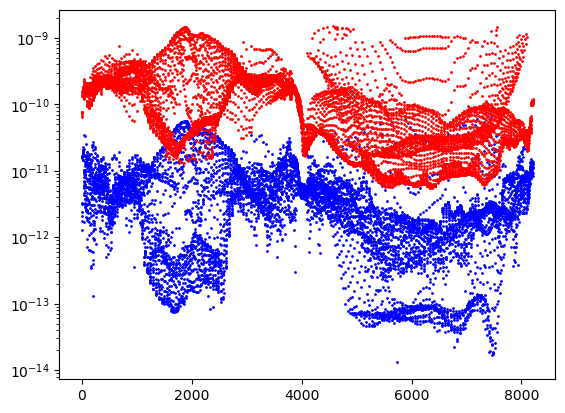

In [18]:
# check the vdf
p_offdiag = f.read_variable('proton/vg_ptensor_offdiagonal',cellids_used)
p_diag = f.read_variable('proton/vg_ptensor_diagonal',cellids_used)
p_diag_norm = np.linalg.norm(p_diag,axis=1)
p_offdiag_norm = np.linalg.norm(p_offdiag,axis=1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(p_offdiag_norm.shape[0]),p_offdiag_norm,s =1,c = 'b')
ax1.scatter(range(p_diag_norm.shape[0]),p_diag_norm,s =1, c = 'r')
ax1.set_yscale('log')
plt.show()

In [19]:
Er_test>0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

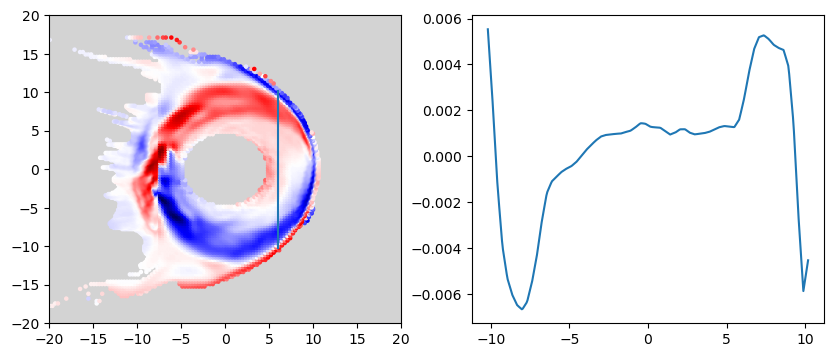

In [20]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_facecolor("lightgrey")

vmin1 = Er.min()
vmax1 = Er.max()
norm1 = mcolors.TwoSlopeNorm(vmin=vmin1, vcenter=0, vmax=vmax1)

scatter = ax1.scatter(x1, y1, c=Er,norm = norm1,cmap = 'seismic',s = 5)
ax1.plot(coords_test_used[:,0],coords_test_used[:,1])
# ax1.scatter(8,8,s = 5,c = 'yellow')
ax1.set_xlim([-20,20])
ax1.set_ylim([-20,20])

ax2 = fig.add_subplot(122)
ax2.plot(coords_test_used[:,1],Er_test)
plt.show()

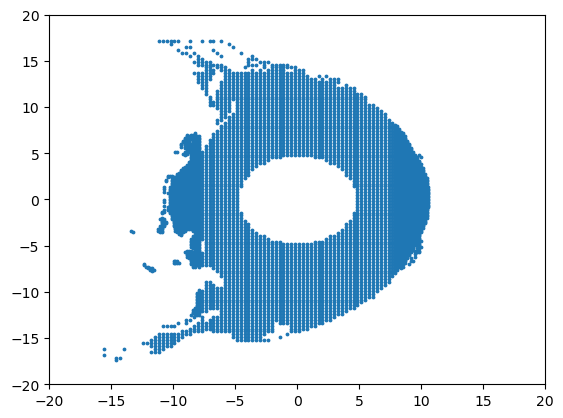

In [21]:
nonm_indice = p_diag_norm/p_offdiag_norm > 20
plt.scatter(coords_used[nonm_indice,0]/Re,coords_used[nonm_indice,1]/Re,s = 3)
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.show()

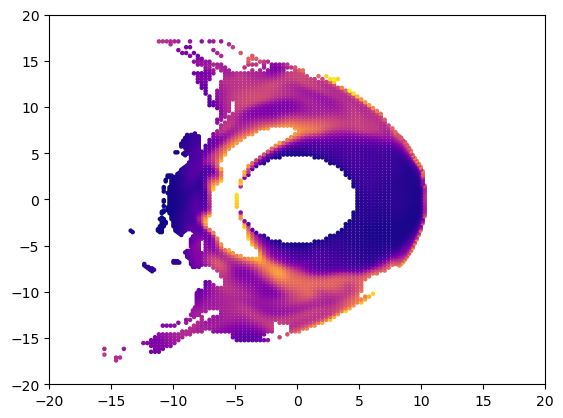

In [22]:
aa = p_diag-np.array([p_diag_norm]*3).T
# plt.scatter(range(aa.shape[0]), np.linalg.norm(aa,axis=1),s = 2)
# plt.show()

indice_aa = np.linalg.norm(aa,axis = 1)<4e-10
# both condition


P1 = Pressure[indice_aa & nonm_indice]

plt.scatter(coords_used[indice_aa & nonm_indice,0]/Re,coords_used[indice_aa & nonm_indice,1]/Re, c = P1,cmap = 'plasma',s = 5)

plt.xlim([-20,20])
plt.ylim([-20,20])
plt.show()

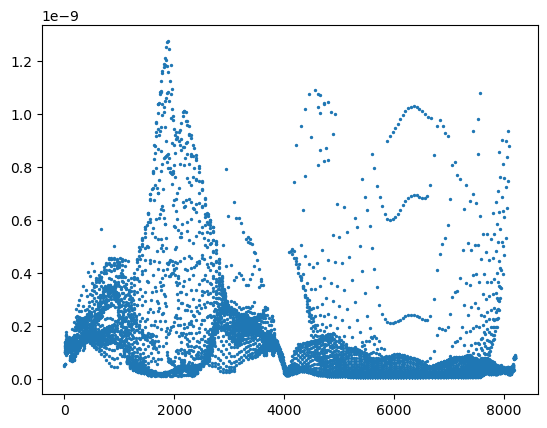

In [23]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# import os

# # Set the environment variable
# os.environ['PTNOLATEX'] = '1'

# # mpl.rcParams['text.usetex'] = True
# # mpl.rcParams.update(mpl.rcParamsDefault)

# pt.plot.plot_vdf(filename = name, coordre = [[10,10,0]], draw = 1)
plt.scatter(range(aa.shape[0]), np.linalg.norm(aa,axis=1),s = 2)
plt.show()

In [24]:
coords_test_used[0:8] # -1,-14

array([[  6.        , -10.19038076,   0.        ],
       [  6.        , -10.13026052,   0.        ],
       [  6.        , -10.07014028,   0.        ],
       [  6.        , -10.01002004,   0.        ],
       [  6.        ,  -9.9498998 ,   0.        ],
       [  6.        ,  -9.88977956,   0.        ],
       [  6.        ,  -9.82965932,   0.        ],
       [  6.        ,  -9.76953908,   0.        ]])

In [25]:
Er_test[0:9]

array([0.00553103, 0.00490524, 0.00427878, 0.00365164, 0.00302384,
       0.00239537, 0.00169443, 0.00099144, 0.0002879 ])

In [26]:
Er_test[-14:-1]

array([-0.00044888, -0.00121952, -0.00198999, -0.00272685, -0.00335892,
       -0.00399095, -0.00462294, -0.00525486, -0.00586838, -0.00559877,
       -0.00533006, -0.00506223, -0.00479527])

In [27]:
seed_coords = np.concatenate((coords_test_used[0:9], coords_test_used[-14:-1]),axis = 0)

In [28]:
np.save("seed_coords.npy",seed_coords)

In [29]:
seed_coords

array([[  6.        , -10.19038076,   0.        ],
       [  6.        , -10.13026052,   0.        ],
       [  6.        , -10.07014028,   0.        ],
       [  6.        , -10.01002004,   0.        ],
       [  6.        ,  -9.9498998 ,   0.        ],
       [  6.        ,  -9.88977956,   0.        ],
       [  6.        ,  -9.82965932,   0.        ],
       [  6.        ,  -9.76953908,   0.        ],
       [  6.        ,  -9.70941884,   0.        ],
       [  6.        ,   9.40881764,   0.        ],
       [  6.        ,   9.46893788,   0.        ],
       [  6.        ,   9.52905812,   0.        ],
       [  6.        ,   9.58917836,   0.        ],
       [  6.        ,   9.6492986 ,   0.        ],
       [  6.        ,   9.70941884,   0.        ],
       [  6.        ,   9.76953908,   0.        ],
       [  6.        ,   9.82965932,   0.        ],
       [  6.        ,   9.88977956,   0.        ],
       [  6.        ,   9.9498998 ,   0.        ],
       [  6.        ,  10.01002

In [30]:
np.load("io_fp.npy")

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [31]:
# The ionosphere plot

